In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df_test.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com


In [4]:
df_train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [5]:
df_train.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

* Going to go with the simplest model:
* Hypothesis is that the lengths of the questions and answers should have some impact on the numbers
* I'll create two columns for length of question and answer, and use a linear regression to get a value in range [0,1]

In [6]:
question_word_count = df_train['question_body'].str.split().str.len()
answer_word_count = df_train['answer'].str.split().str.len()

In [7]:
question_word_count.describe()

count    6079.000000
mean      125.263695
std       116.011233
min         0.000000
25%        55.000000
50%        92.000000
75%       154.000000
max      1416.000000
Name: question_body, dtype: float64

In [8]:
answer_word_count.describe()

count    6079.000000
mean      133.022208
std       155.570789
min         3.000000
25%        47.000000
50%        88.000000
75%       163.000000
max      2376.000000
Name: answer, dtype: float64

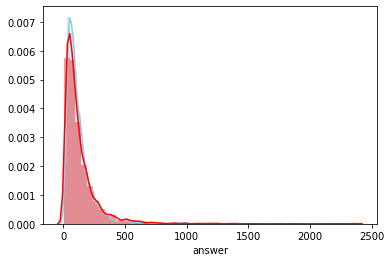

In [9]:
sns.distplot(question_word_count , color="skyblue", label="Question Length")
sns.distplot(answer_word_count , color="red", label="Answer Length")

In [10]:
d = {"question_word_count": question_word_count, "answer_word_count": answer_word_count}
X = pd.DataFrame(d)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

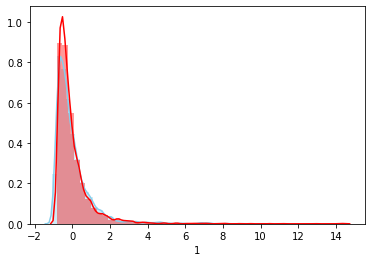

In [11]:
sns.distplot( X[0] , color="skyblue", label="Question Length")
sns.distplot( X[1] , color="red", label="Answer Length")

In [12]:
y = df_train.iloc[:,11:]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [76]:
lr = LinearRegression()
lr_multi = MultiOutputRegressor(lr)

In [77]:
lr_multi.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                     n_jobs=None)

In [78]:
y_predict = lr_multi.predict(X_test)

In [79]:
y_predict

array([[0.90467808, 0.62218625, 0.08666054, ..., 0.16647708, 0.73689994,
        0.92768019],
       [0.87366311, 0.51119936, 0.06302006, ..., 0.14034029, 0.45720509,
        0.90028582],
       [0.89579518, 0.61220057, 0.0490078 , ..., 0.11519545, 0.43929924,
        0.90385292],
       ...,
       [0.90161035, 0.63894164, 0.04503834, ..., 0.10818059, 0.43256787,
        0.90464125],
       [0.89733382, 0.61165946, 0.05874628, ..., 0.12863969, 0.51350087,
        0.90964466],
       [0.89390471, 0.60150909, 0.05312858, ..., 0.12148983, 0.46142092,
        0.90506132]])

In [80]:
y_predict = pd.DataFrame(y_predict)

In [81]:
corrs = []
for i in range(y_predict.shape[1]):
    corrs.append(spearmanr(y_predict.iloc[:,i], y_test.iloc[:,i])[0])

In [82]:
np.mean(corrs)

0.13799075794006566

In [21]:
def preprocess(df):
    question_word_count = df['question_body'].str.split().str.len()
    answer_word_count = df['answer'].str.split().str.len()
    d = {"qa_id": df['qa_id'],
         "question_word_count": question_word_count,
         "answer_word_count": answer_word_count}
    X = pd.DataFrame(d)
    X.iloc[:,1:] = scaler.fit_transform(X.iloc[:,1:])

    return X

def predict(X):
    y_predict = lr_multi.predict(X.iloc[:,1:])
    y_predict = pd.DataFrame(y_predict)
    
    return pd.concat([X['qa_id'],y_predict], axis=1)

In [22]:
X_submission = preprocess(df_test)

In [23]:
sub_df = predict(X_submission)

In [24]:
sub_df.to_csv("submission.csv", index = False)

* 14% correlation... not the best model, but a baseline to go from